In [1]:
# Import the libraries required
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
census_data = pd.read_csv("acs2015_county_data.csv", index_col=0);

In [3]:
census_data.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
census_data.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,6.993507e+04,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,2.051189e+05,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+01,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,8.450500e+03,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,1.964300e+04,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,4.992050e+04,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,6.046749e+06,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [5]:
census_data.corr()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,0.999877,0.999886,0.113882,-0.187370,0.075296,-0.046038,0.447874,0.027104,0.996378,...,-0.047901,0.036125,-0.027852,0.148545,0.997621,0.196913,-0.143553,-0.146419,-0.085016,0.030306
Men,0.999877,1.000000,0.999527,0.114286,-0.186478,0.072807,-0.045818,0.449085,0.028143,0.995819,...,-0.048278,0.036560,-0.027384,0.147537,0.997481,0.196025,-0.142667,-0.146133,-0.084826,0.029516
Women,0.999886,0.999527,1.000000,0.113466,-0.188187,0.077676,-0.046240,0.446604,0.026096,0.996685,...,-0.047526,0.035697,-0.028297,0.149481,0.997524,0.197722,-0.144373,-0.146661,-0.085180,0.031060
Hispanic,0.113882,0.114286,0.113466,1.000000,-0.724959,-0.144540,-0.056119,0.044244,-0.002645,0.104092,...,0.000392,0.041738,-0.120975,0.035312,0.102515,-0.170047,0.212196,-0.005562,-0.047897,0.321975
White,-0.187370,-0.186478,-0.188187,-0.724959,1.000000,-0.466185,-0.231565,-0.199347,-0.075080,-0.183133,...,-0.048004,-0.173506,0.217985,-0.077046,-0.176872,0.228257,-0.405057,0.202066,0.112044,-0.538941
Black,0.075296,0.072807,0.077676,-0.144540,-0.466185,1.000000,-0.097140,0.019916,-0.035385,0.081138,...,-0.169504,-0.004333,-0.281791,0.186750,0.071231,0.064072,0.115743,-0.305339,-0.137477,0.352578
Native,-0.046038,-0.045818,-0.046240,-0.056119,-0.231565,-0.097140,1.000000,-0.002663,0.033927,-0.050108,...,0.362889,0.347975,0.167324,-0.207657,-0.047252,-0.402015,0.452651,0.045619,0.077294,0.188074
Asian,0.447874,0.449085,0.446604,0.044244,-0.199347,0.019916,-0.002663,1.000000,0.353935,0.456733,...,0.187220,0.133118,0.013706,0.043008,0.463088,0.108109,-0.030053,-0.156825,-0.087749,-0.059663
Pacific,0.027104,0.028143,0.026096,-0.002645,-0.075080,-0.035385,0.033927,0.353935,1.000000,0.027806,...,0.209134,0.160300,0.020612,-0.066947,0.026891,-0.118206,0.140242,0.004529,-0.004515,-0.037973
Citizen,0.996378,0.995819,0.996685,0.104092,-0.183133,0.081138,-0.050108,0.456733,0.027806,1.000000,...,-0.051720,0.035693,-0.031685,0.152106,0.995176,0.212811,-0.152932,-0.161904,-0.092302,0.031339


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1049acf60>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

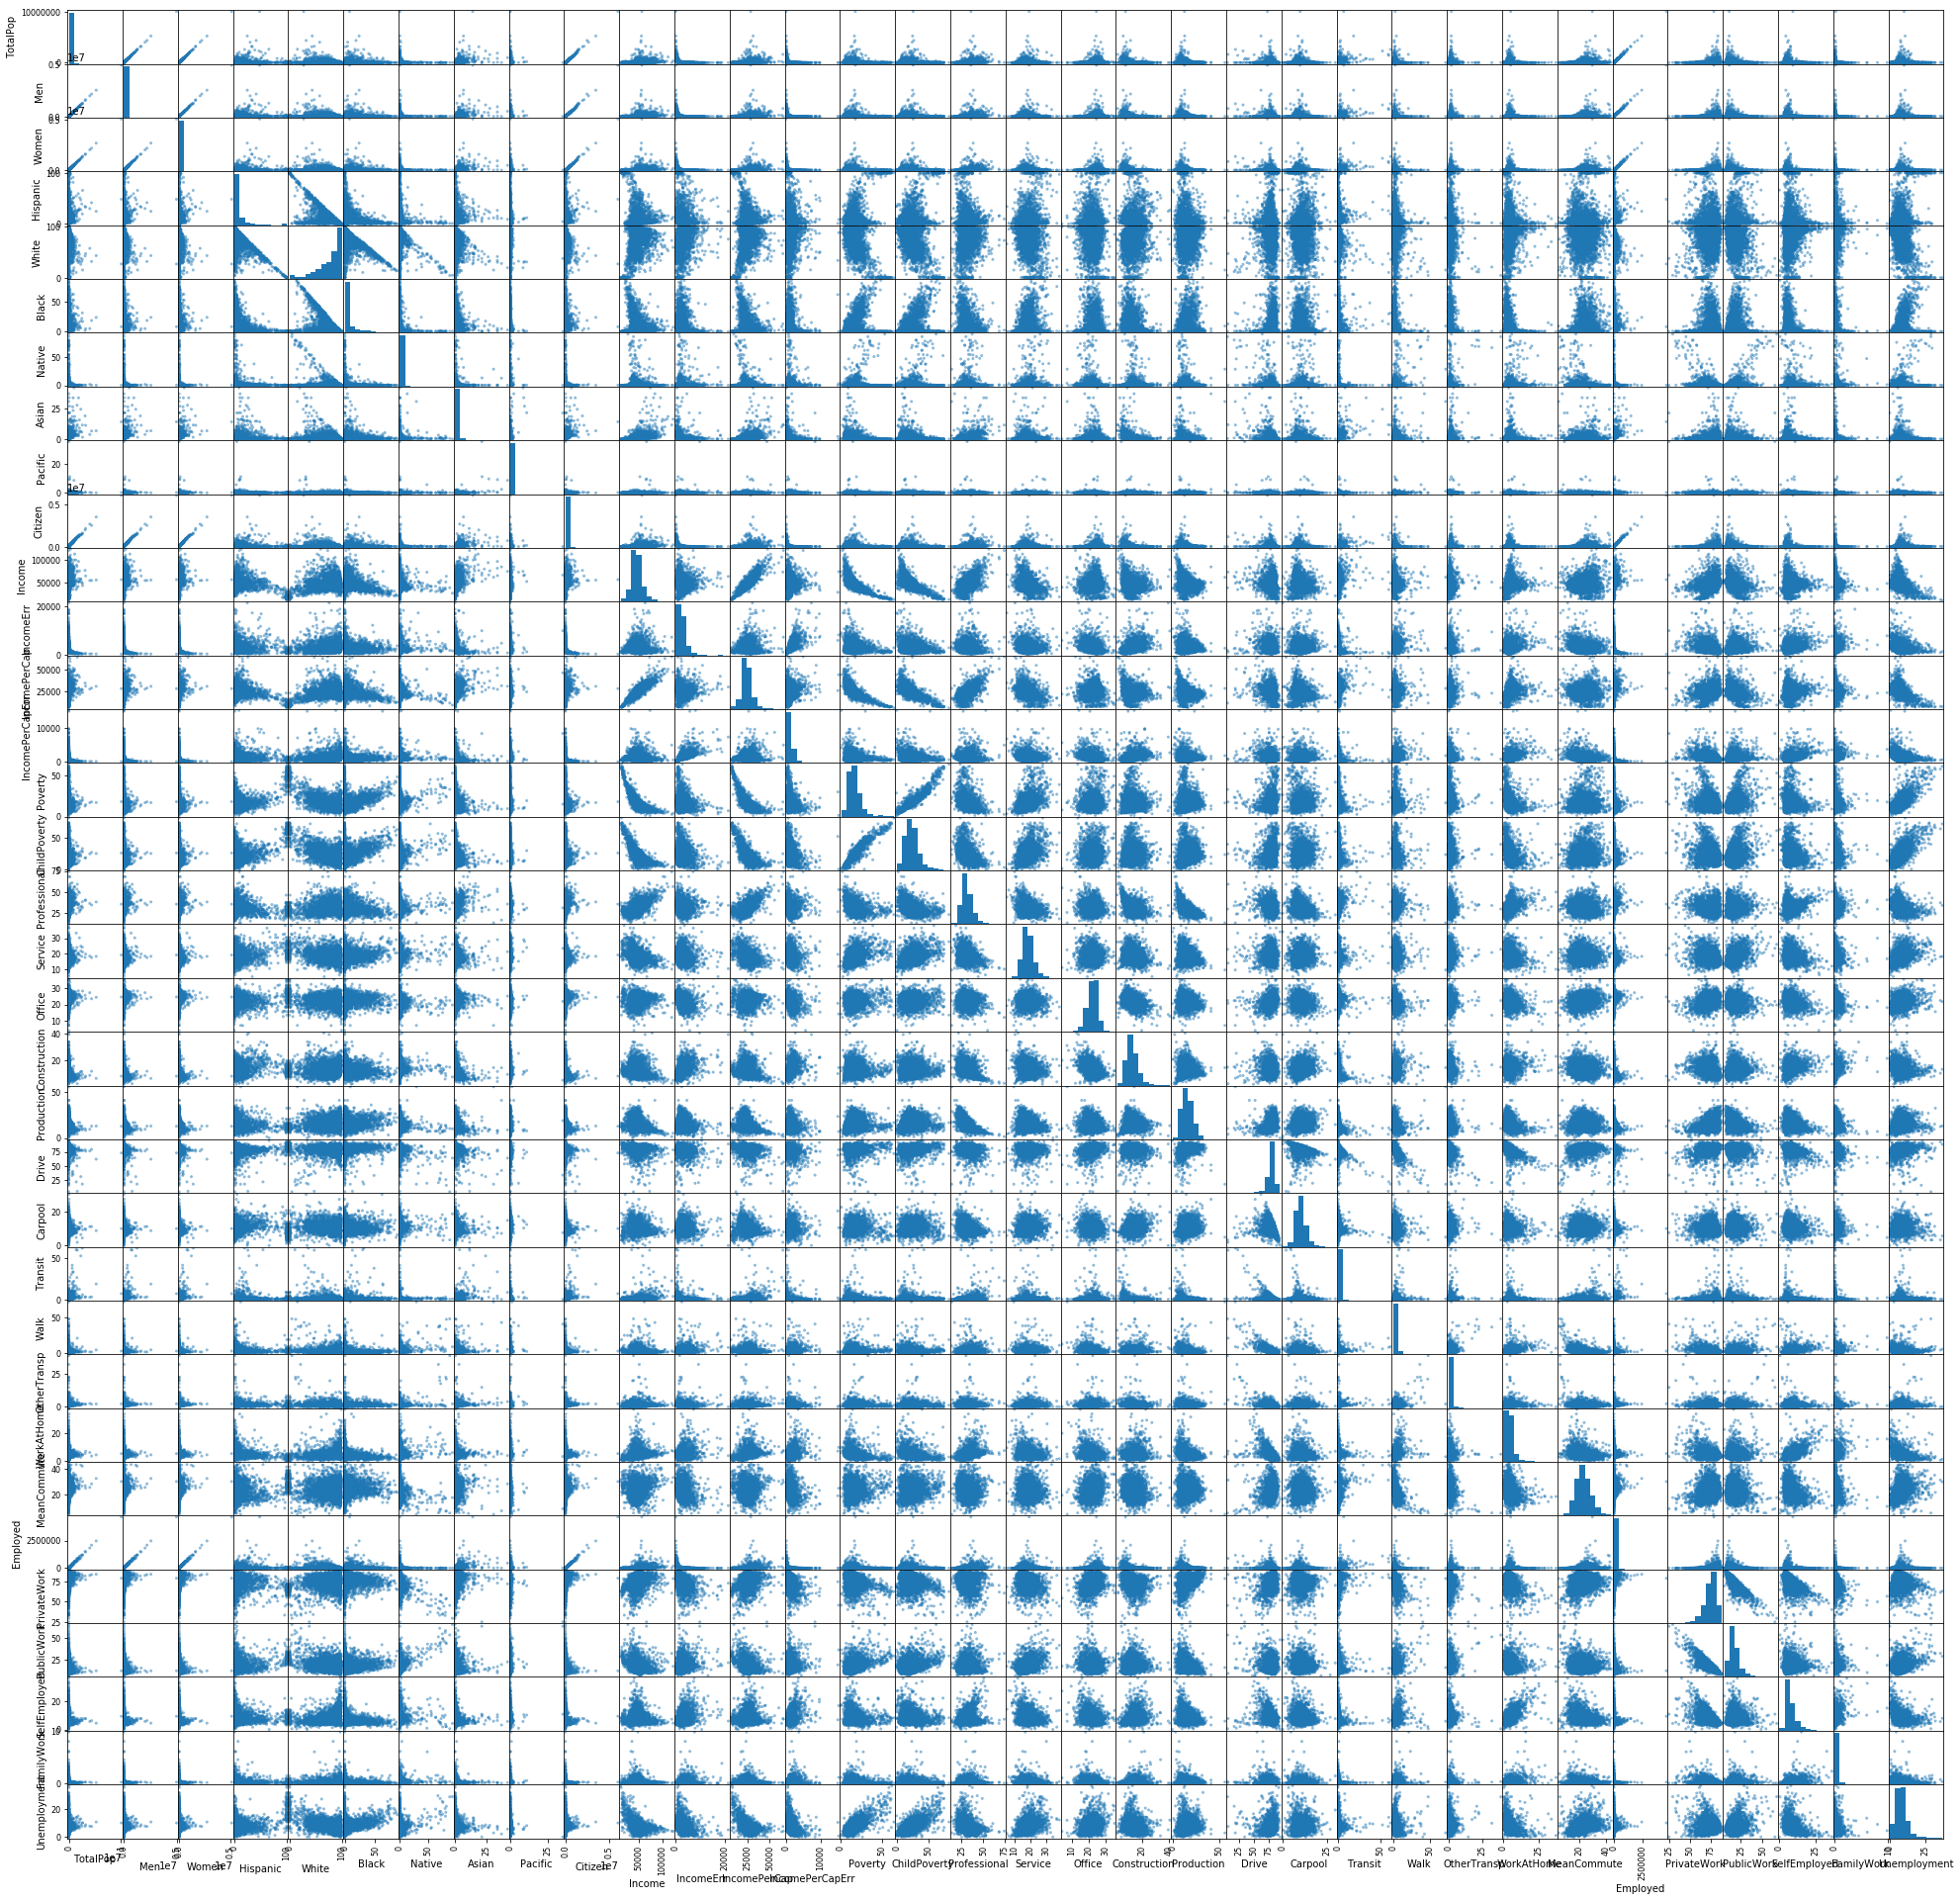

In [6]:
pd.plotting.scatter_matrix(census_data, figsize=(34,34))

In [158]:
lm = smf.ols(formula='Poverty ~ Unemployment', data=census_data).fit()

In [159]:
lm.params

Intercept       5.784329
Unemployment    1.446540
dtype: float64

In [160]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Poverty   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     3315.
Date:                Fri, 02 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:59:01   Log-Likelihood:                -10250.
No. Observations:                3220   AIC:                         2.050e+04
Df Residuals:                    3218   BIC:                         2.052e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7843      0.228     25.380      0.000       5.337       6.231
Unemployment     1.4465      0.025     57.577      0.000       1.397       1.496
==============================================================================
Omnibus:                     1091.465   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6459.346
Skew:                           1.485   Prob(JB):                         0.00
Kurtosis:                       9.271   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

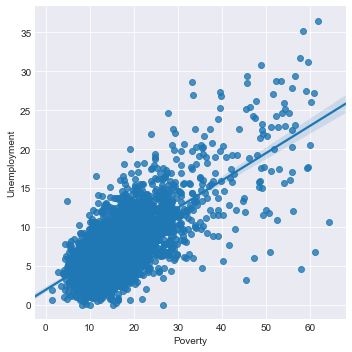

In [161]:
import seaborn as sns
sns.set_style("darkgrid")

sns.lmplot(x='Poverty', y='Unemployment', data=census_data)